# Data Science Job Market Analysis

## Introduction

In the 21st century, data science has emerged as a critical field, influencing decision-making in industries ranging from finance to healthcare. The ability to extract meaningful insights from data is now a pivotal skill, driving innovation and competitive advantage. 

We will analyze the job market for data science roles using a comprehensive dataset from 2021. While it is a few years old, this dataset continues to provide valuable insights about salary distributions, popular job titles, required skill, and industry trends. 


## Methodology
- **Data Collection**: Data was scraped from Glassdoor job listings for 2021
- **Data Cleaning**: Removing duplicates, handling nissing values, and standardizing data formats.
- **Exploratory Data Analysis**: Identifying trends, correlaitons, and distributions in the data.**

# Prepare the data
In this section, we first import the necessary libraries for data manipulation and analysis to read data from a CSV file into a DataFrame.

- **Pandas**: Used for data manipulation and cleaning. It offers data structures and operations for manipulating numerical tables and time series.
- **NumPy**: Provides support for large, multi-dimensional arrays and matrices, with a large collection of high-lebel mathematical functions to operate on these arrays.
- **Matplotlib**: A plotting library for creating static, interactive, and animated visualizations in Python.
- **Seaborn**: It provides a high-level interface for drawing attractive and informative statistical graphics.
- **Plotly**: An open source library that provides interactive data visualizations to understand data simply and easily.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from matplotlib.ticker import FixedLocator, FuncFormatter
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

# Loading the Data
This dataset is loaded into a pandas DataFrame and the first few rows are displayed to get an overview of the data.

In [2]:
df = pd.read_csv(r"C:\Users\Christopher Hanryan\Downloads\Uncleaned_DS_jobs.csv", index_col=[0])
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', 10)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
index,,,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,-1
668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1,-1,-1


# Exploratory Data Analysis

### Understanding the data
We need to gain an understanding of the dataset's structure and content. Below, we will start by identifying the data types of each columns, drop some potential unused columns, and data cleaning.

In [3]:
# Check columns
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [4]:
# Check data types of each column
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
                      ...   
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
Length: 14, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 672 entries, 0 to 671
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          672 non-null    object 
 1   Salary Estimate    672 non-null    object 
 2   Job Description    672 non-null    object 
 3   Rating             672 non-null    float64
 4   Company Name       672 non-null    object 
 5   Location           672 non-null    object 
 6   Headquarters       672 non-null    object 
 7   Size               672 non-null    object 
 8   Founded            672 non-null    int64  
 9   Type of ownership  672 non-null    object 
 10  Industry           672 non-null    object 
 11  Sector             672 non-null    object 
 12  Revenue            672 non-null    object 
 13  Competitors        672 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 78.8+ KB


## Data Cleaning
This section will focus on preparing the raw dataset for analysis ny indentifying and correcting inaccuracies, removing duplicates, handle missing values, and standardizing data formats. These processes are a must to ensure the data is accurate and reliable. 

### Dropping column and duplicates
Competitors and Sector are dropped from the dataset since we do not need them in our analysis. As well as duplications, we want to remove them to maintain the integrity of the dataset.

In [6]:
# Drop Competitors and Sector column
df = df.drop(columns=['Competitors', 'Sector'], axis=1)
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Revenue
index,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Unknown / Non-Applicable
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,$1 to $2 billion (USD)
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,$100 to $500 million (USD)
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,$100 to $500 million (USD)
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...
667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Unknown / Non-Applicable
668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,-1.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,-1
669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,-1.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,-1


In [7]:
# Drop potential duplicates
df = df.drop_duplicates()
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Revenue
index,,,,,,,,,,,,
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Unknown / Non-Applicable
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,$1 to $2 billion (USD)
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,$100 to $500 million (USD)
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,$100 to $500 million (USD)
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable


### Scan Missing Values
The presence of missing data can affect the quality and accuracy of the analysis. It can also significantly impact visualizations that may output misleading conclusions. 

In [8]:
# Check if there are NaN values
pd.set_option('display.max.rows', None)
df.isna().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Revenue              0
dtype: int64

In [9]:
# Get rough statistic information
df.describe()

,Rating,Founded
count,659.000000,659.000000
mean,3.592413,1661.701062
std,1.295563,733.544565
min,-1.000000,-1.000000
25%,3.400000,1932.500000
50%,3.800000,1995.000000
75%,4.300000,2009.000000
max,5.000000,2019.000000


### Salary Estimate Cleanup
This columns consists of extra characters like 'K', 'Glassdoor est.' and '$' which are not useful in our analysis. Therefore, we need to remove it to simplify the data processing.

In [10]:
rep = {'K': '', '(Glassdoor est.) ': '', '-': '-', r'\$': ''}
df.loc[:, 'Salary Estimate'] = df['Salary Estimate'].replace(rep, regex=True).apply(lambda x: x.split('(')[0])
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Revenue
index,,,,,,,,,,,,
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Unknown / Non-Applicable
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,$1 to $2 billion (USD)
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,$100 to $500 million (USD)
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,$100 to $500 million (USD)
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable


### Replacing extra colons in the Job Description Field
What we do to make this column look cleaner:

1. **Replacing New Line Characters**: We replace sequences of newline characters ('\n+) with a single colon followed by a space (': '). This helps in standardizing the break points in text.
2. **Removing Excessive Colons**: Some descriptions contain multiple consecutive colons. Reducing these to a single colon enhances the visual cleanliness and readability of the text, making it seamless for stakeholders to review the data.

In [11]:
# Replace values 
df.loc[:, 'Job Description'] = (df['Job Description'].str.replace('\n+', ': ', regex=True)
                                .str.replace('::+', ': ', regex=True)
                                .str.replace('â', ' ')
                                .str.replace('€', ' ')
                               )
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Revenue
index,,,,,,,,,,,,
0,Sr Data Scientist,137-171,Description: The Senior Data Scientist is resp...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Unknown / Non-Applicable
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future: Join th...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,$1 to $2 billion (USD)
2,Data Scientist,137-171,Overview: Analysis Group is one of the largest...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,$100 to $500 million (USD)
3,Data Scientist,137-171,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,$100 to $500 million (USD)
4,Data Scientist,137-171,Data Scientist: Affinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable


In [12]:
# Get Rating values of -1
df.query('Rating == -1').head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Revenue
index,,,,,,,,,,,,
154,ELISA RESEARCH SCIENTIST (CV-15),90-109,"Covaxx, a subsidiary of the UBI Group, has joi...",-1.0,Covid-19 Search Partners,"Hauppauge, NY",-1,-1,-1,-1,-1,-1
158,Machine Learning Engineer,101-165,Overview: Radical Convergence is a fast-paced ...,-1.0,Radical Convergence,"Reston, VA",-1,-1,-1,-1,-1,-1
230,Data Scientist,71-123,Senior Data Scientist Active Secret clearance ...,-1.0,"Encode, Inc.","Norfolk, VA","Manalapan, NJ",1 to 50 employees,-1,Company - Private,IT Services,$5 to $10 million (USD)
282,Data Scientist,91-150,Greetings from Trovetechs!!!: Â: We have an im...,-1.0,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,-1,Company - Private,-1,Unknown / Non-Applicable
285,Data Scientist,141-225,Greetings from Trovetechs!!!: Â: We have an im...,-1.0,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,-1,Company - Private,-1,Unknown / Non-Applicable


In [13]:
# Replace -1.0 values with 0.0
df.loc[:, 'Rating'] = np.where(df['Rating'] == -1.0, 0.0, df['Rating'])
df.query('Rating == 0.0').head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Revenue
index,,,,,,,,,,,,
154,ELISA RESEARCH SCIENTIST (CV-15),90-109,"Covaxx, a subsidiary of the UBI Group, has joi...",0.0,Covid-19 Search Partners,"Hauppauge, NY",-1,-1,-1,-1,-1,-1
158,Machine Learning Engineer,101-165,Overview: Radical Convergence is a fast-paced ...,0.0,Radical Convergence,"Reston, VA",-1,-1,-1,-1,-1,-1
230,Data Scientist,71-123,Senior Data Scientist Active Secret clearance ...,0.0,"Encode, Inc.","Norfolk, VA","Manalapan, NJ",1 to 50 employees,-1,Company - Private,IT Services,$5 to $10 million (USD)
282,Data Scientist,91-150,Greetings from Trovetechs!!!: Â: We have an im...,0.0,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,-1,Company - Private,-1,Unknown / Non-Applicable
285,Data Scientist,141-225,Greetings from Trovetechs!!!: Â: We have an im...,0.0,Trovetechs Inc,"San Francisco, CA","Hillsborough, NJ",Unknown,-1,Company - Private,-1,Unknown / Non-Applicable


In [14]:
# Check Ratings info is accurate
df['Rating'].describe()

count    659.000000
mean       3.651593
std        1.090806
min        0.000000
25%        3.400000
50%        3.800000
75%        4.300000
max        5.000000
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Probability'>

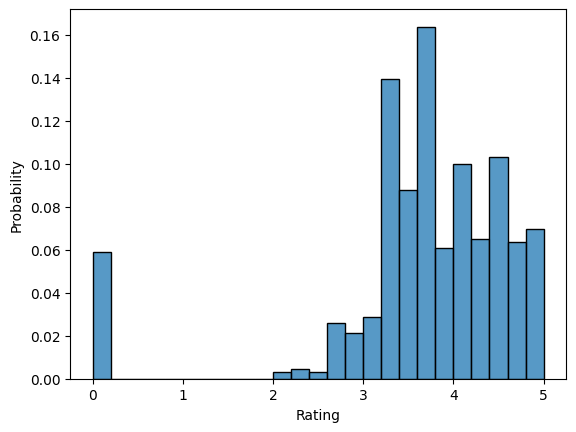

In [15]:
#df['Rating'].plot.hist(bins = 20, color='skyblue', figsize=(5,5))
#plt.xlabel('Rating')
sns.histplot(df['Rating'], stat='probability')

In [16]:
# Renamed column for good practice
df = df.rename(columns= {'Job Title': 'Job_Title',
                         'Salary Estimate': 'Salary_Estimate',
                         'Job Description': 'Job_Description',
                         'Company Name': 'Company_Name',
                         'Type of ownership': 'Ownership_Type'}
              )
df.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Ownership_Type,Industry,Revenue
index,,,,,,,,,,,,
0,Sr Data Scientist,137-171,Description: The Senior Data Scientist is resp...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Unknown / Non-Applicable
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future: Join th...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,$1 to $2 billion (USD)
2,Data Scientist,137-171,Overview: Analysis Group is one of the largest...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,$100 to $500 million (USD)
3,Data Scientist,137-171,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,$100 to $500 million (USD)
4,Data Scientist,137-171,Data Scientist: Affinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable


In [17]:
mask = df['Company_Name'].str.contains(r'\d+\.\d+')
df['Company_Name'] = (np.where(mask, df['Company_Name']
                               .str.split('\n')
                               .str[0], df['Company_Name']))
df.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Ownership_Type,Industry,Revenue
index,,,,,,,,,,,,
0,Sr Data Scientist,137-171,Description: The Senior Data Scientist is resp...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Unknown / Non-Applicable
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future: Join th...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,$1 to $2 billion (USD)
2,Data Scientist,137-171,Overview: Analysis Group is one of the largest...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,$100 to $500 million (USD)
3,Data Scientist,137-171,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,$100 to $500 million (USD)
4,Data Scientist,137-171,Data Scientist: Affinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable


In [18]:
# Creates copy of dataframe to ensure flexiblity and replace string -1 
headq_copy = df[['Headquarters']].copy()
headq_copy['Headquarters'] = headq_copy['Headquarters'].replace('-1', pd.NA)
df['Headquarters'] = headq_copy['Headquarters']

In [19]:
# Check for replaced values
df[df['Headquarters'].isnull()]

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Ownership_Type,Industry,Revenue
index,,,,,,,,,,,,
154,ELISA RESEARCH SCIENTIST (CV-15),90-109,"Covaxx, a subsidiary of the UBI Group, has joi...",0.0,Covid-19 Search Partners,"Hauppauge, NY",<NA>,-1,-1,-1,-1,-1
158,Machine Learning Engineer,101-165,Overview: Radical Convergence is a fast-paced ...,0.0,Radical Convergence,"Reston, VA",<NA>,-1,-1,-1,-1,-1
258,Data Scientist,90-124,Full Time Data Scientist: The Drive Media is s...,5.0,"The Drive Media, Inc.","New York, NY",<NA>,Unknown,-1,Unknown,-1,Unknown / Non-Applicable
351,Data Scientist,122-146,About Our AI/ML Team: Our mission is to build ...,0.0,Point72 Ventures,"Palo Alto, CA",<NA>,-1,-1,-1,-1,-1
357,Data Scientist,122-146,Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",<NA>,-1,-1,-1,-1,-1
388,Data Scientist,110-163,"Job Description: As a Data Scientist, you will...",0.0,HireAi,"San Francisco, CA",<NA>,-1,-1,-1,-1,-1
424,Data Scientist,124-198,"Get To Know Voice: At Voice, we are on a missi...",3.4,Voice,"Brooklyn, NY",<NA>,Unknown,-1,Company - Private,-1,Unknown / Non-Applicable
459,Data Scientist,69-116,We are looking for a highly motivated data sci...,0.0,Blue Cloak LLC,"Sterling, VA",<NA>,-1,-1,-1,-1,-1
495,Data Scientist,95-119,Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",<NA>,-1,-1,-1,-1,-1


In [20]:
# Replace -1 values with Unknown
df['Size'] = df['Size'].replace('-1', pd.NA)
df[df['Size'].isnull()]

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Ownership_Type,Industry,Revenue
index,,,,,,,,,,,,
154,ELISA RESEARCH SCIENTIST (CV-15),90-109,"Covaxx, a subsidiary of the UBI Group, has joi...",0.0,Covid-19 Search Partners,"Hauppauge, NY",<NA>,<NA>,-1,-1,-1,-1
158,Machine Learning Engineer,101-165,Overview: Radical Convergence is a fast-paced ...,0.0,Radical Convergence,"Reston, VA",<NA>,<NA>,-1,-1,-1,-1
351,Data Scientist,122-146,About Our AI/ML Team: Our mission is to build ...,0.0,Point72 Ventures,"Palo Alto, CA",<NA>,<NA>,-1,-1,-1,-1
357,Data Scientist,122-146,Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",<NA>,<NA>,-1,-1,-1,-1
388,Data Scientist,110-163,"Job Description: As a Data Scientist, you will...",0.0,HireAi,"San Francisco, CA",<NA>,<NA>,-1,-1,-1,-1
459,Data Scientist,69-116,We are looking for a highly motivated data sci...,0.0,Blue Cloak LLC,"Sterling, VA",<NA>,<NA>,-1,-1,-1,-1
495,Data Scientist,95-119,Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",<NA>,<NA>,-1,-1,-1,-1
519,"Scientist / Group Lead, Cancer Biology",212-331,"Scientist / Group Lead, Cancer Biology: Locati...",0.0,Monte Rosa Therapeutics,"Cambridge, MA",<NA>,<NA>,-1,-1,-1,-1
555,Data Scientist,128-201,"Job Description: As a Data Scientist, you will...",0.0,HireAi,"San Francisco, CA",<NA>,<NA>,-1,-1,-1,-1


In [21]:
# Output NA values 
df['Founded'] = df['Founded'].replace(to_replace= -1, value = pd.NA)
df[df['Founded'].isnull()].head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Ownership_Type,Industry,Revenue
index,,,,,,,,,,,,
69,Data Scientist - Machine Learning,79-131,"Headquartered in Brisbane, Calif., CareDx, Inc...",2.5,CareDx,"Brisbane, CA","Brisbane, CA",1 to 50 employees,<NA>,Company - Private,Biotech & Pharmaceuticals,Unknown / Non-Applicable
112,Data Scientist (TS/SCI),99-132,Are you an intelligence analyst looking to fur...,3.5,Maxar Technologies,"Herndon, VA","Westminster, CO",5001 to 10000 employees,<NA>,Company - Public,Aerospace & Defense,$2 to $5 billion (USD)
154,ELISA RESEARCH SCIENTIST (CV-15),90-109,"Covaxx, a subsidiary of the UBI Group, has joi...",0.0,Covid-19 Search Partners,"Hauppauge, NY",<NA>,<NA>,<NA>,-1,-1,-1
158,Machine Learning Engineer,101-165,Overview: Radical Convergence is a fast-paced ...,0.0,Radical Convergence,"Reston, VA",<NA>,<NA>,<NA>,-1,-1,-1
162,Geospatial Data Scientist,101-165,Maxar is seeking a seasoned Geospatial Data Sp...,3.5,Maxar Technologies,"Chantilly, VA","Westminster, CO",5001 to 10000 employees,<NA>,Company - Public,Aerospace & Defense,$2 to $5 billion (USD)


In [22]:
df.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Ownership_Type,Industry,Revenue
index,,,,,,,,,,,,
0,Sr Data Scientist,137-171,Description: The Senior Data Scientist is resp...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Unknown / Non-Applicable
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future: Join th...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,$1 to $2 billion (USD)
2,Data Scientist,137-171,Overview: Analysis Group is one of the largest...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,$100 to $500 million (USD)
3,Data Scientist,137-171,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,$100 to $500 million (USD)
4,Data Scientist,137-171,Data Scientist: Affinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable


In [23]:
# Create function to replace values for remaining columns
col_rep = ['Ownership_Type', 'Industry', 'Revenue']
def rep_remaining(df):
    return df[col_rep].replace('-1', pd.NA)

df[col_rep] = rep_remaining(df[col_rep])
df[df['Ownership_Type'].isnull()].head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Ownership_Type,Industry,Revenue
index,,,,,,,,,,,,
154,ELISA RESEARCH SCIENTIST (CV-15),90-109,"Covaxx, a subsidiary of the UBI Group, has joi...",0.0,Covid-19 Search Partners,"Hauppauge, NY",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
158,Machine Learning Engineer,101-165,Overview: Radical Convergence is a fast-paced ...,0.0,Radical Convergence,"Reston, VA",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
351,Data Scientist,122-146,About Our AI/ML Team: Our mission is to build ...,0.0,Point72 Ventures,"Palo Alto, CA",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
357,Data Scientist,122-146,Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
388,Data Scientist,110-163,"Job Description: As a Data Scientist, you will...",0.0,HireAi,"San Francisco, CA",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [24]:
df.loc[:, ['Ownership_Type', 'Industry', 'Revenue']].isna().sum()

Ownership_Type    16
Industry          60
Revenue           16
dtype: int64

In [25]:
# Create new columns to get min and max salaries
df[['min_salary', 'max_salary']] = (df['Salary_Estimate']
                                    .str.split('-', expand=True)
                                    .apply(pd.to_numeric, errors='coerce'))

In [26]:
# Get average salaries
df['avg_salary'] = (df['min_salary'] + df['max_salary']) // 2
df.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Ownership_Type,Industry,Revenue,min_salary,max_salary,avg_salary
index,,,,,,,,,,,,,,,
0,Sr Data Scientist,137-171,Description: The Senior Data Scientist is resp...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Unknown / Non-Applicable,137,171,154
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future: Join th...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,$1 to $2 billion (USD),137,171,154
2,Data Scientist,137-171,Overview: Analysis Group is one of the largest...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,$100 to $500 million (USD),137,171,154
3,Data Scientist,137-171,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,$100 to $500 million (USD),137,171,154
4,Data Scientist,137-171,Data Scientist: Affinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,137,171,154


In [27]:
df.loc[:, ['min_salary', 'max_salary', 'avg_salary']].isna().sum()

min_salary    0
max_salary    0
avg_salary    0
dtype: int64

In [28]:
df['min_salary'].describe()

count    659.000000
mean      99.066768
std       33.266335
min       31.000000
25%       79.000000
50%       91.000000
75%      122.000000
max      212.000000
Name: min_salary, dtype: float64

In [29]:
df['max_salary'].describe()

count    659.000000
mean     148.464340
std       48.387744
min       56.000000
25%      119.000000
50%      133.000000
75%      165.000000
max      331.000000
Name: max_salary, dtype: float64

In [30]:
# Keywords to search for
key = ['python', 'excel', 'hadoop', 'spark', 'tableau', 'aws', 'big data', 'machine learning']
# Checks each row for keywords and return series of 1s or 0s
def check_keyword(row):
    return pd.Series({keyword: int(keyword in row['Job_Description'].lower()) for keyword in key})
# Apply to each row and join to original dataframe
df = df.join(df.apply(check_keyword, axis=1))

In [31]:
df = df.rename(columns={'big data': 'big_data', 'machine learning': 'machine_learning'})
df.loc[:, 'python': 'machine_learning'].head()

,python,excel,hadoop,spark,tableau,aws,big_data,machine_learning
index,,,,,,,,
0,0,0,0,0,0,1,0,1
1,0,0,1,0,0,0,1,1
2,1,1,0,0,0,1,0,1
3,1,1,0,0,0,1,0,1
4,1,1,0,0,0,0,0,1


In [32]:
df.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Ownership_Type,Industry,Revenue,min_salary,max_salary,avg_salary,python,excel,hadoop,spark,tableau,aws,big_data,machine_learning
index,,,,,,,,,,,,,,,,,,,,,,,
0,Sr Data Scientist,137-171,Description: The Senior Data Scientist is resp...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Unknown / Non-Applicable,137,171,154,0,0,0,0,0,1,0,1
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future: Join th...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,$1 to $2 billion (USD),137,171,154,0,0,1,0,0,0,1,1
2,Data Scientist,137-171,Overview: Analysis Group is one of the largest...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,$100 to $500 million (USD),137,171,154,1,1,0,0,0,1,0,1
3,Data Scientist,137-171,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,$100 to $500 million (USD),137,171,154,1,1,0,0,0,1,0,1
4,Data Scientist,137-171,Data Scientist: Affinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,137,171,154,1,1,0,0,0,0,0,1


In [33]:
df.describe()

,Rating,min_salary,max_salary,avg_salary,python,excel,hadoop,spark,tableau,aws,big_data,machine_learning
count,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000
mean,3.651593,99.066768,148.464340,123.576631,0.726859,0.447648,0.215478,0.268589,0.185129,0.247344,0.209408,0.613050
std,1.090806,33.266335,48.387744,39.923157,0.445911,0.497629,0.411466,0.443562,0.388697,0.431796,0.407195,0.487422
min,0.000000,31.000000,56.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.400000,79.000000,119.000000,103.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.800000,91.000000,133.000000,114.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.300000,122.000000,165.000000,136.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,5.000000,212.000000,331.000000,271.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Cleaning up rows with NaN values
Removing NaN/Null values from rows are the best way to maintain clean data especially when we get into the visualizations

In [34]:
df.isnull().sum()

Job_Title             0
Salary_Estimate       0
Job_Description       0
Rating                0
Company_Name          0
Location              0
Headquarters         20
Size                 16
Founded             107
Ownership_Type       16
Industry             60
Revenue              16
min_salary            0
max_salary            0
avg_salary            0
python                0
excel                 0
hadoop                0
spark                 0
tableau               0
aws                   0
big_data              0
machine_learning      0
dtype: int64

In [35]:
df = df.dropna(subset=['Industry', 'Revenue', 'Ownership_Type', 'Founded', 'Size', 'Headquarters'])

In [36]:
# Check
df.isnull().sum()

Job_Title           0
Salary_Estimate     0
Job_Description     0
Rating              0
Company_Name        0
Location            0
Headquarters        0
Size                0
Founded             0
Ownership_Type      0
Industry            0
Revenue             0
min_salary          0
max_salary          0
avg_salary          0
python              0
excel               0
hadoop              0
spark               0
tableau             0
aws                 0
big_data            0
machine_learning    0
dtype: int64

## Visualizations
Visualizations are useful for data cleaning, detecting outliers, identifying trends and clusters, and spottling local patterns. In this sections, we will derive insights that gives us a better understanding of large datasets and complex relationships.

## Industry Distribution
The pie chart below illustrates the proportion of job listings across the top 10 industries in 2021. We can denote that the Biotech and Pharmaceuticals sector represents the largest share with 15.57%, followed by IT services and Computer Hardware & Software. This gives us an understanding which sectors were actively hiring and potentially deduce the job market trends of the period.

Text(0.5, 1.0, 'Top 10 Industries')

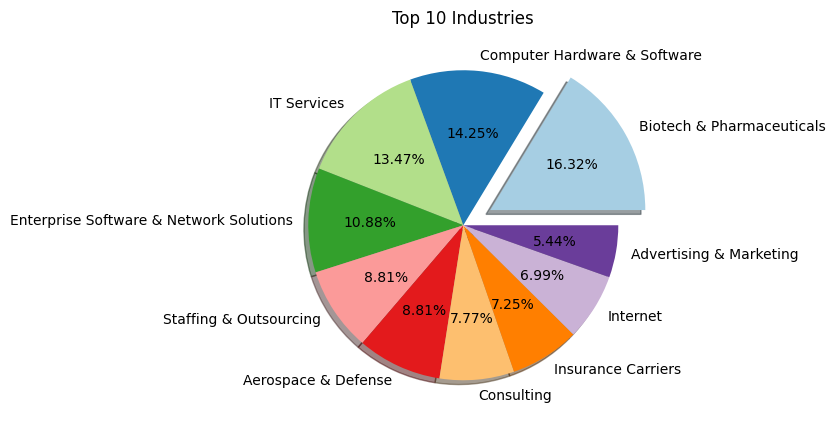

In [37]:
# Get total value of the top ten industries
top_ten = df['Industry'].value_counts().head(10)

plt.figure(figsize=(5,7))
myexplode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
plt.pie(top_ten, labels=top_ten.index, shadow=True, autopct="%.2f%%",
        explode=myexplode, colors=sns.color_palette('Paired'))
plt.title('Top 10 Industries')

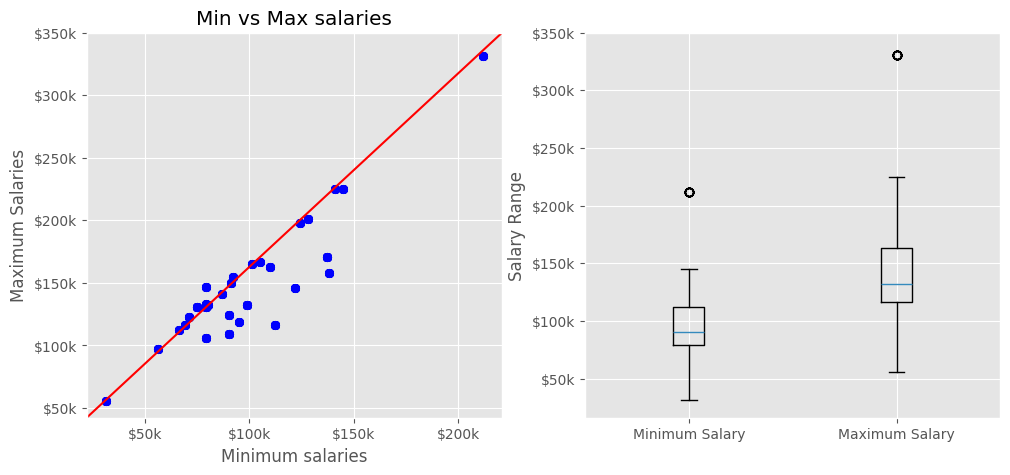

In [38]:
# Plotting to see relationship:
# Positive correlation between min and max salaries
# Outliers are presented to show significantly higher values

def attributes(ax, ylabel, title, yticks):
    sal_ticks_labels = [f"${x}k" for x in yticks]
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_yticks(yticks)
    ax.set_yticklabels(sal_ticks_labels)

sal_ticks = list(range(50, 400, 50))
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8.5,5))

ax[0].plot([0,1], [0,1], color='red', transform=ax[0].transAxes)

ax[0].set_xlabel('Minimum salaries')
ax[0].set_ylabel('Maximum salaries')
locator = FixedLocator(sal_ticks)

ax[0].set_xticks(sal_ticks, [f"${y}k" for y in sal_ticks])
ax[0].scatter(df['min_salary'], df['max_salary'], c='b', alpha=0.5)
attributes(ax[0], 'Maximum Salaries', 'Min vs Max salaries', sal_ticks)

ax[1].boxplot([df['min_salary'], df['max_salary']], labels=['Minimum Salary', 'Maximum Salary'])
attributes(ax[1], 'Salary Range', '', sal_ticks)

plt.subplots_adjust(right=1.2)

The scatter plot on the left shows the relationship betweeen minimum salaries (horizontal axis) and maximum salaries (vertical axis) for various roles (dots). A line of best fit (shown in red) indicates a positive correlation: As the minimum salary increases, so does the maximum salary. This suggests that roles with higher entry requirements tend to offer greater earning potential. 

The box plot provides a summary of the salary ranges for minimum and maximum salaries, highlighting the interquartile range and outliers. We are able to understand the salary structures and could help candidates negotiate salaries based on financial goals.

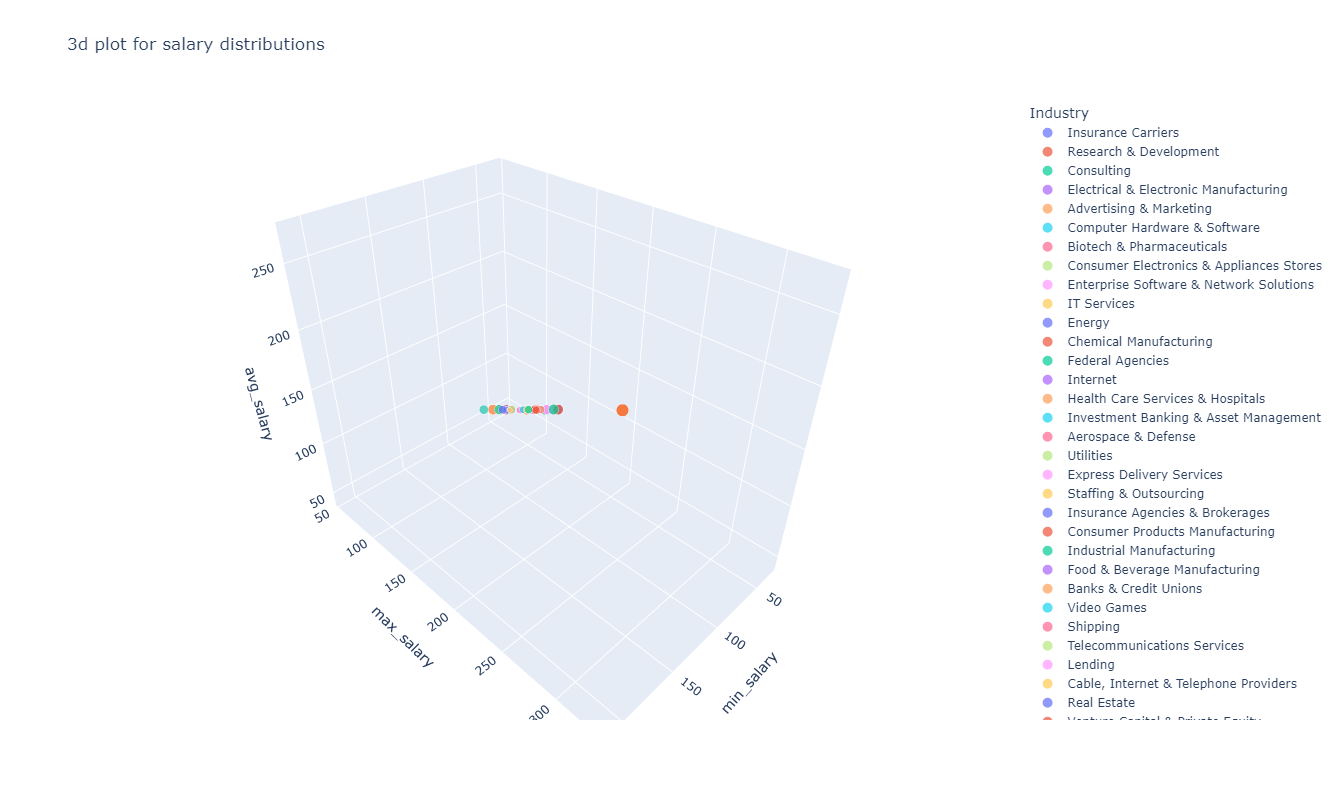

In [39]:
fig = px.scatter_3d(data_frame=df, x='min_salary', y='max_salary', z='avg_salary',
                    color='Industry', size='min_salary', title='3d plot for salary distributions',
                   width=1000, height=800)
#fig.layout.height = 500
fig.show()

The following plot above offers an interactive visualization of the salary distributions across different industries. 

Text(0.5, 1.0, 'Minimum salary distribution across the top 3 industries')

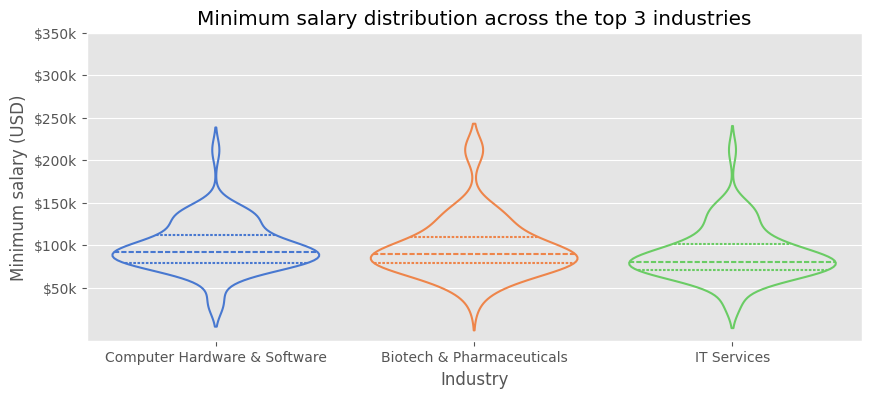

In [40]:
# Viewing the distribution of minimum salaries across industries
top_three = df['Industry'].value_counts().head(3).index
plt.figure(figsize=(10,4))
ax = sns.violinplot(x='Industry', y='min_salary', data=df[df['Industry'].isin(top_three)], 
                    hue='Industry', palette='muted', fill=False, inner='quartiles')
ax.set_yticks(sal_ticks,[f"${x}k" for x in sal_ticks])
ax.set_ylabel('Minimum salary (USD)')
ax.set_title('Minimum salary distribution across the top 3 industries')

## Second type of Vizualization for Salary Distribution
This chart presents the distribution of minimum salaries across the top three industries in our dataset. It is to highlight the baseline salaries that potential employees might expect when starting in a particular sector. The width of each violin at different salary levels shows how many jobs within that industry offer that salary. We can denote that the thick bar in the middle is the range where the middle 50 % of salaries fall into.

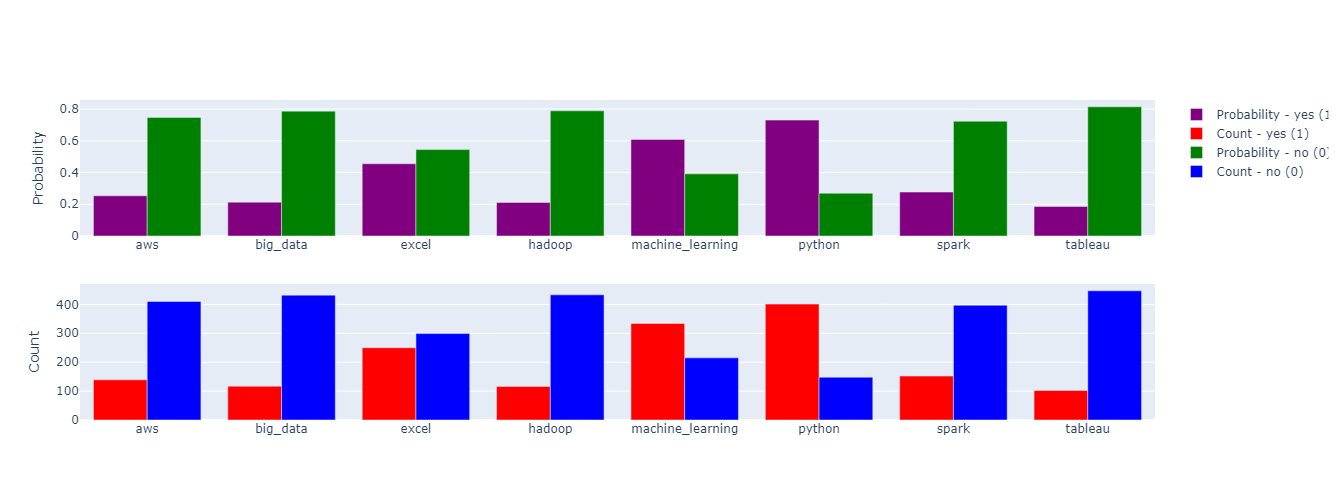

In [41]:
# To create subplots with 2 rows and 1 column
fig = make_subplots(rows=2, cols=1)
# Get required data for melt function
data = df[['python', 'excel', 'hadoop', 'spark', 
             'tableau', 'aws', 'big_data', 'machine_learning']]

# Melt function: Unpivots a DataFrame from a wide format to a long format
# Converts DataFrame into long DataFrame with two columns: Skill and Presence
data_melted = data.melt(var_name='Skill', value_name='Presence')
# Grouping data and resetting index
prob_data = data_melted.groupby(['Skill', 'Presence']).size().reset_index(name = 'Count')
# divide the total of Counts by the number of skill req
prob_data['Probability'] = prob_data['Count'] / len(data)
conditions = [
    {'presence': 1, 'prob_color': 'purple', 'count_color': 'red', 'prob_name': 'Probability - yes (1)', 'count_name': 'Count - yes (1)'},
    {'presence': 0, 'prob_color': 'green', 'count_color': 'blue', 'prob_name': 'Probability - no (0)',  'count_name': 'Count - no (0)'}
]
for cond in conditions:
    # Subplot #1
    fig.add_trace(
        go.Bar(x=prob_data.query(f'Presence == {cond["presence"]}')['Skill'], 
               y=prob_data.query(f'Presence == {cond["presence"]}')['Probability'], 
               name=cond['prob_name'],
               marker_color=cond['prob_color']
        ), 
        row=1, col=1
    )
    
    fig.add_trace( 
         go.Bar(x=prob_data.query(f'Presence == {cond["presence"]}')['Skill'], 
                y=prob_data.query(f'Presence == {cond["presence"]}')['Count'],
                name=cond['count_name'],
                marker_color=cond['count_color']
        ), 
        row=2, col=1
    )

fig.update_layout(height=500, 
                  width=1000)

fig.update_yaxes(title_text='Probability', row=1, col=1)
fig.update_yaxes(title_text='Count', row=2, col=1)


fig.show()


## Finding Relevant skills
This figure contains two subplots that analyzes the presence of specific skills. Understanding the probability and count of job listings requiring specific skills helps job seekers prioritize their learning development. Employers are able to use this information to tailor their job postings to attract qualified candidates with the most relevant skills.

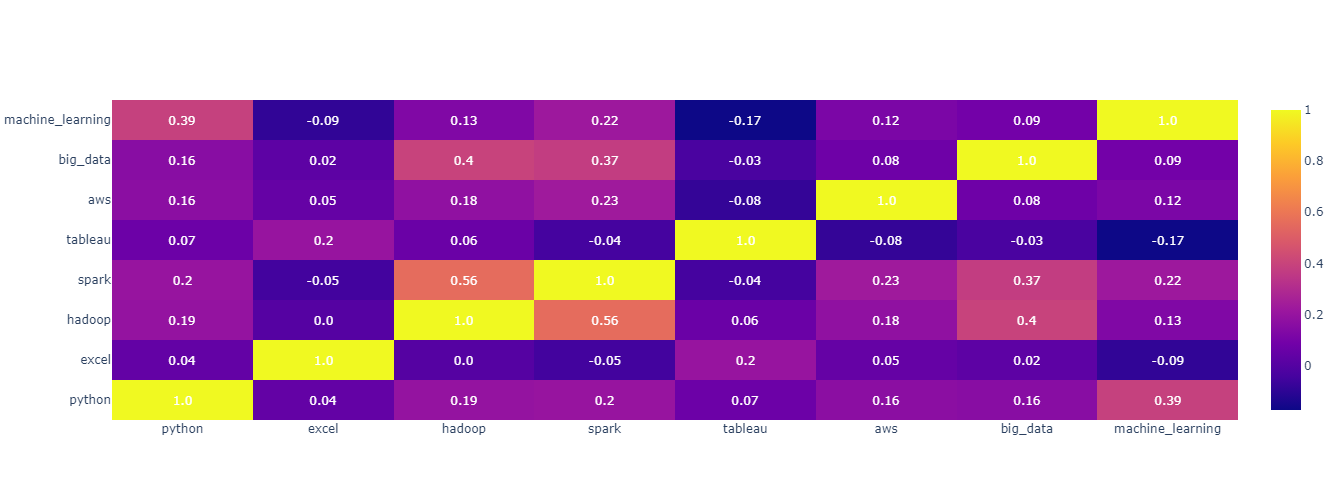

In [42]:
# Take the correlation coefficients between each pair of skills
correl = df[['python', 'excel', 'hadoop', 'spark', 
             'tableau', 'aws', 'big_data', 'machine_learning']].corr()
# Get row and columns of alues of correlation 
leng = [(i, j) for i in range(len(correl)) for j in range(len(correl))]
annotations = [
    # Create layout
    go.layout.Annotation(
        x = correl.columns[j],
        y = correl.columns[i],
        text=str(round(correl.iloc[i,j], 2)),
        showarrow=False,
        font=dict(size=12, color="white")
    )
    for i, j in leng
]
# Create heatmap with the values
fig = go.Figure(data=go.Heatmap(
    z=correl.values,
    x=correl.columns,
    y=correl.columns
))
# Adjust heatmap
fig.update_layout(height=500, 
                  width=1000,
                 annotations=annotations)
fig.show()



## Heatmap correlation
We have created a heatmap that shows the correlation of skills with one another.

In [43]:
correl.corr()

,python,excel,hadoop,spark,tableau,aws,big_data,machine_learning
python,1.000000,-0.333963,-0.073029,-0.002287,-0.265404,-0.021282,-0.092405,0.502619
excel,-0.333963,1.000000,-0.450428,-0.548530,0.297051,-0.229500,-0.335512,-0.499063
hadoop,-0.073029,-0.450428,1.000000,0.737634,-0.294022,0.020835,0.508763,-0.027316
spark,-0.002287,-0.548530,0.737634,1.000000,-0.483652,0.138536,0.481139,0.164456
tableau,-0.265404,0.297051,-0.294022,-0.483652,1.000000,-0.447702,-0.367254,-0.596458
aws,-0.021282,-0.229500,0.020835,0.138536,-0.447702,1.000000,-0.131176,0.026836
big_data,-0.092405,-0.335512,0.508763,0.481139,-0.367254,-0.131176,1.000000,-0.060410
machine_learning,0.502619,-0.499063,-0.027316,0.164456,-0.596458,0.026836,-0.060410,1.000000


In [44]:
df_cleaned = df.copy()

In [45]:
df_cleaned.head()

,Job_Title,Salary_Estimate,Job_Description,Rating,Company_Name,Location,Headquarters,Size,Founded,Ownership_Type,Industry,Revenue,min_salary,max_salary,avg_salary,python,excel,hadoop,spark,tableau,aws,big_data,machine_learning
index,,,,,,,,,,,,,,,,,,,,,,,
0,Sr Data Scientist,137-171,Description: The Senior Data Scientist is resp...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Unknown / Non-Applicable,137,171,154,0,0,0,0,0,1,0,1
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future: Join th...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,$1 to $2 billion (USD),137,171,154,0,0,1,0,0,0,1,1
2,Data Scientist,137-171,Overview: Analysis Group is one of the largest...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,$100 to $500 million (USD),137,171,154,1,1,0,0,0,1,0,1
3,Data Scientist,137-171,JOB DESCRIPTION: Do you have a passion for Da...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,$100 to $500 million (USD),137,171,154,1,1,0,0,0,1,0,1
4,Data Scientist,137-171,Data Scientist: Affinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Unknown / Non-Applicable,137,171,154,1,1,0,0,0,0,0,1


In [46]:
# Save cleaned dataset to csv
df.to_csv('cleaned_DS_Jobs.csv', index=False)